# Import Neccessary Library  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid", palette="tab10")

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid", palette="tab10")

In [3]:
import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [4]:
df = pd.read_csv('water_potability.csv', header=None)
df.columns = ["id", "pH", "Hardness", "Solids", "Chloramines", "Sulfate", "Conductivity", "OrganicCarbon", "Trihalomethanes", "Turbidity", "Potability"]
df.columns = [s.lower() for s in df.columns]
df.head()

,id,ph,hardness,solids,chloramines,sulfate,conductivity,organiccarbon,trihalomethanes,turbidity,potability
0,1,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
1,2,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
2,3,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
3,4,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
4,5,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


## Descriptive Statistics - 1

In [5]:
df.potability = df.potability.astype('object') # Karena kategorikal, diganti saja. tujuannya biar gk muncul waktu di describe
df.dtypes

id                   int64
ph                 float64
hardness           float64
solids             float64
chloramines        float64
sulfate            float64
conductivity       float64
organiccarbon      float64
trihalomethanes    float64
turbidity          float64
potability          object
dtype: object

In [6]:
from scipy import stats
from scipy.optimize import minimize

# MASI BELUM SOLVED
def get_continuous_mode(col):
    params = stats.norm.fit(df[col])
    def density(x):
        return -stats.norm.pdf(x,*params)

    return minimize(density, 0).x[0]

In [7]:
desc = df.describe()[df.columns[1:-1]].T
desc["range"] = desc["max"] - desc["min"]
desc["IQR"] = desc["75%"] - desc["25%"]
desc["var"] = desc.apply(lambda x: df[x.name].var(), axis=1)
desc["skew"] = desc.apply(lambda x: df[x.name].skew(), axis=1)
desc["kurtosis"] = desc.apply(lambda x: df[x.name].kurt(), axis=1)
desc["median"] = desc.apply(lambda x: df[x.name].median(), axis=1)

# modes = [get_continuous_mode(col) for col in df.columns[1:-1]]
# modes.append(df['potability'].mode()[0])
# desc["modus"] = modes

In [8]:
desc = desc[["mean", "median", "std", "var", "range", "min", "max", "25%", "50%", "75%", "IQR", "skew", "kurtosis"]]
desc.rename(columns={"25%" : "Q1", "50%" : "Q2", "75%" : "Q3"}, inplace=True)
desc

,mean,median,std,var,range,min,max,Q1,Q2,Q3,IQR,skew,kurtosis
ph,7.087193,7.029490,1.572803,2.473709e+00,13.772501,0.227499,14.000000,6.090785,7.029490,8.053006,1.962221,0.048535,0.626904
hardness,195.969209,197.203525,32.643166,1.065576e+03,243.845890,73.492234,317.338124,176.740657,197.203525,216.447589,39.706932,-0.085321,0.525480
solids,21904.673439,20926.882155,8625.397911,7.439749e+07,56167.729801,320.942611,56488.672413,15614.412962,20926.882155,27170.534649,11556.121687,0.591011,0.337320
chloramines,7.134322,7.142014,1.585214,2.512904e+00,11.736129,1.390871,13.127000,6.138326,7.142014,8.109933,1.971607,0.013003,0.549782
sulfate,333.211376,332.214113,41.211111,1.698356e+03,352.030642,129.000000,481.030642,307.626986,332.214113,359.268147,51.641161,-0.045728,0.786854
conductivity,426.476708,423.438372,80.701872,6.512792e+03,551.722883,201.619737,753.342620,366.619219,423.438372,482.209772,115.590553,0.268012,-0.237206
organiccarbon,14.357940,14.323286,3.325770,1.106075e+01,24.806707,2.200000,27.006707,12.122530,14.323286,16.683562,4.561031,-0.020220,0.031018
trihalomethanes,66.400717,66.482041,16.081109,2.586021e+02,115.422987,8.577013,124.000000,55.949993,66.482041,77.294613,21.344620,-0.051383,0.223017
turbidity,3.969497,3.967374,0.780471,6.091350e-01,5.044749,1.450000,6.494749,3.442882,3.967374,4.514663,1.071781,-0.032266,-0.049831


In [9]:
print("Modus potability =", df.potability.mode()[0])

Modus potability = 0


In [10]:
# Modus kolom lain
df.mode()

,id,ph,hardness,solids,chloramines,sulfate,conductivity,organiccarbon,trihalomethanes,turbidity,potability
0,1,0.227499,73.492234,320.942611,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000,0
1,2,0.989912,77.459586,1198.943699,1.920271,180.206746,210.319182,4.371899,14.343161,1.492207,NaN
2,3,1.431782,81.710895,1351.906979,2.397985,182.397370,233.907965,4.466772,15.684877,1.496101,NaN
3,4,1.757037,94.091307,1372.091043,2.456014,187.170714,245.859632,4.861631,16.291505,1.680554,NaN
4,5,1.985383,94.812545,2552.962804,2.458609,187.424131,252.968328,4.966862,17.527765,1.812529,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2005,2006,11.568768,286.567991,50793.898917,12.580026,458.441072,666.690618,23.569645,114.034946,6.307678,NaN
2006,2007,11.898078,287.975540,53735.899194,12.626900,460.107069,669.725086,23.604298,114.208671,6.357439,NaN
2007,2008,12.246928,300.292476,55334.702799,12.653362,475.737460,695.369528,23.917601,116.161622,6.389161,NaN
2008,2009,13.349889,306.627481,56351.396304,13.043806,476.539717,708.226364,24.755392,120.030077,6.494249,NaN


## Histogram and Boxplot Visualization - 2 & 3

function

In [11]:
def box_plot(data, color, edge_color, ax):
    bplot = ax.boxplot(notch=True,
                        vert=True, 
                        patch_artist=True,  
                        x=data) 

    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bplot[element], color=edge_color)

    for patch in bplot['boxes']:
        patch.set_facecolor(color)    

    return bplot

def draw_boxhist(col):
    f, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))
    f.tight_layout()
    box_plot(df[col], "lightblue", "blue", ax[0])
    sns.histplot(data=df[col], ax=ax[1], kde=True, fill=False)
    plt.show()

##### kolom pH

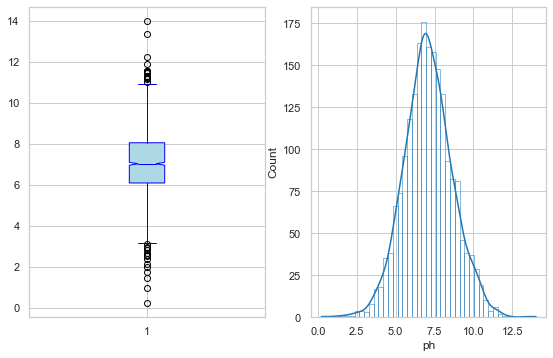

In [12]:
draw_boxhist("ph")

pada boxplot, terlihat mean kurang lebih terletak tepat diantara kuartil satu dan kuartil tiga, dan jarak mean ke maximum dan minimum kurang lebih sama. dapat disimpulkan bahwa kolom pH memiliki skewness yang mendekati nol. Dilihat dari histogram, distribusi data pH mendekati distribusi normal.

##### Kolom Hardness

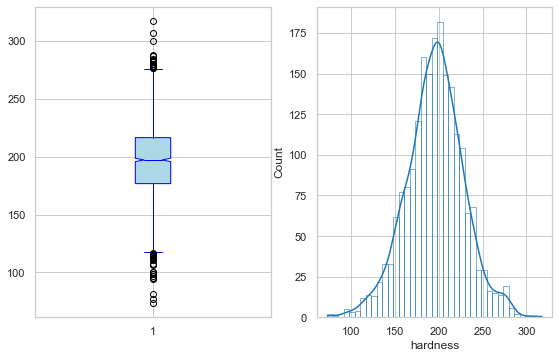

In [13]:
draw_boxhist("hardness")

ini mirip sih sama pH, tinggal diganti aja jadi kolom pH. jadi daripada aku copy langsung sekrang, mending nti aja ketika udah pasti penjelasannya.

##### Kolom Solids

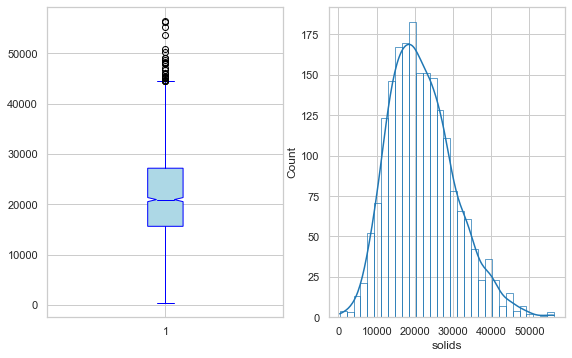

In [14]:
draw_boxhist("solids")

blalalla wish wash wish wash, skew kanan

##### Kolom Chloramines

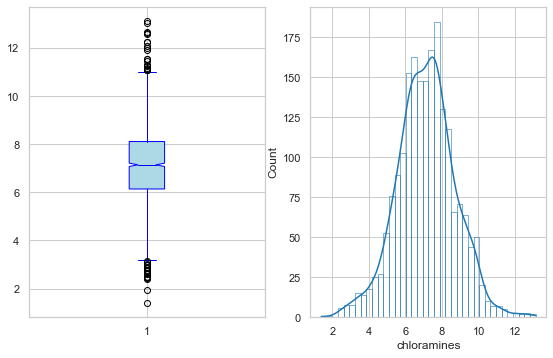

In [15]:
draw_boxhist("chloramines")


mirip pH

##### Kolom Sulfate

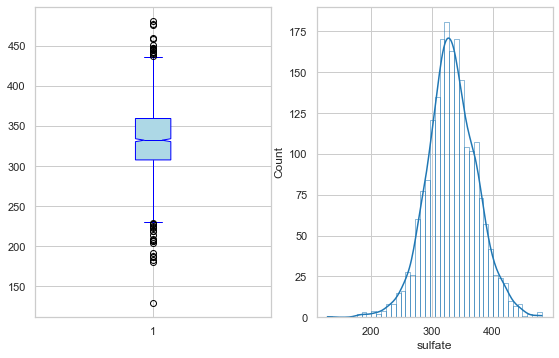

In [16]:
draw_boxhist("sulfate")


mirip pH. agak skew kiri, tapi dikit banget lah, lebih condong normal

##### Kolom Conductivity

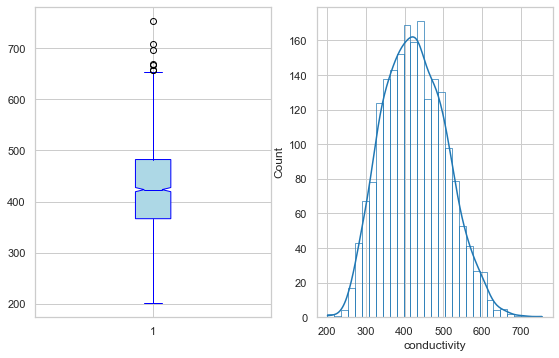

In [17]:
draw_boxhist("conductivity")


punya ekor lebih panjang di sisi kanan, dilihat dari boxplot lebih banyak pencilan di kanan. jadi disimpulkan dia skew kanan.

##### Kolom OrganicCarbon

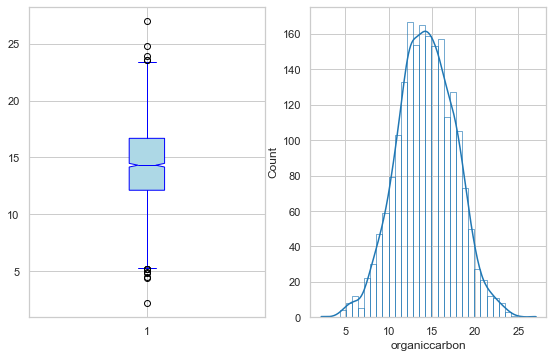

In [18]:
draw_boxhist("organiccarbon")


mirip pH.

##### Kolom Trihalomethanes

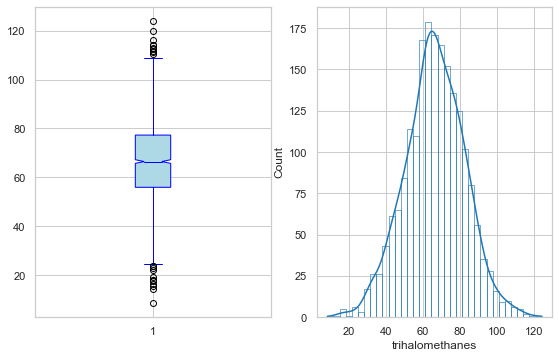

In [19]:
draw_boxhist("trihalomethanes")

mirip pH

##### Kolom Turbidity

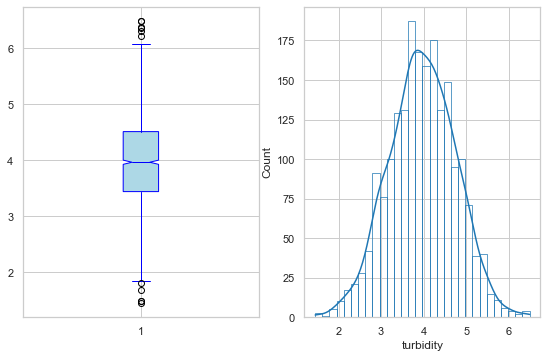

In [20]:
draw_boxhist("turbidity")

mirip pH

dalam pada Kolom Potability merupakan data kategorikal, bukan data numerik. sehingga berdasarkan perintah no 2 dan 3, tidak perlu dibuat histogram dan boxplot.

## Normality Test

## Hypothesis 1 Test - 4

Pada dataset ini, digunakan t-test untuk melakukan uji hipotesis. T-test digunakan karena data yang tertera merupakan data sampel, bukan data populasi sehingga sebenarnya variansi populasi tidak diketahui.

Namun, karena n = 2010 (>= 30) dan dapat dilihat pada bagian sebelumnya bahwa sebagian besar atribut berbentuk *bell-shaped*, maka t-test dapat didekati dengan z-test.

In [21]:
import scipy.stats as st

### Bagian A: Rata-rata pH di atas 7

Hipotesis
$$ 
^1H_0: \mu = 7 \\ \newline
^2H_1: \mu > 7 \\ \newline $$
dengan tingkat signifikansi
$$ ^3\alpha = 0.05 \newline $$
dan daerah kritis 
$$ ^4Z > 1.645 $$

In [22]:
mu_0 = 7; n = df.shape[0]

std = desc.loc["ph"]["std"]
xbar = desc.loc["ph"]["mean"]
zscore = (xbar - mu_0)/(std/np.sqrt(n))

print("5.a) Z-score =", zscore)
print("5.b) P-value =", 1 - st.norm.cdf(zscore))

5.a) Z-score = 2.485445147379887
5.b) P-value = 0.006469476288896492


Karena p-value < 0.05 dan Z > 1.645, hipotesis nol ditolak.

### Bagian B: Rata-rata hardness tidak sama dengan 205

Hipotesis
$$ 
^1H_0: \mu = 205 \\ \newline
^2H_1: \mu \neq 205 \\ \newline $$
dengan tingkat signifikansi
$$ ^3\alpha = 0.05 \newline $$
dan daerah kritis 
$$ ^4Z > 1.96 \enspace atau \enspace Z < -1.96 $$

In [23]:
mu_0 = 205; n = df.shape[0]

std = desc.loc["hardness"]["std"]
xbar = desc.loc["hardness"]["mean"]
zscore = (xbar - mu_0)/(std/np.sqrt(n))

print("5.a) Z-score =", zscore)
if(zscore > 0):
    print("5.b) P-value =", 2*(1-st.norm.cdf(zscore)))
else:
    print("5.b) P-value =", 2*(st.norm.cdf(zscore)))

5.a) Z-score = -12.403137170010732
5.b) P-value = 2.5128904895144654e-35


karena P value jauh lebih kecil dari alpha (0.05)m dan Z score lebih kecil dari -1.96, maka hipotesis nol ditolak.

### Bagian C: Nilai Rata-rata 100 baris pertama kolom Solids bukan 21900?

Hipotesis
$$ 
^1H_0: \mu = 21900 \\ \newline
^2H_1: \mu \neq 21900 \\ \newline $$
dengan tingkat signifikansi
$$ ^3\alpha = 0.05 \newline $$
dan daerah kritis
$$ ^4Z > 1.96 \enspace atau \enspace Z < -1.96 $$

In [24]:
mu_0 = 21900; n = 100

std = df["solids"].iloc[:n].std()
xbar = df["solids"].iloc[:n].mean()

zscore = (xbar - mu_0)/(std/np.sqrt(n))

print("5.a) Z-score =", zscore)
if(zscore > 0):
    print("5.b) P-value =", 2*(1-st.norm.cdf(zscore)))
else:
    print("5.b) P-value =", 2*(st.norm.cdf(zscore)))

5.a) Z-score = 0.5636797715721551
5.b) P-value = 0.5729720864655174


P value yang didapat lebih besar dari alpha, Zscore < 1.96 dan Zscore > -1.96, jadi H0 diterima. 

### Bagian D: Proporsi nilai Conductivity yang lebih dari 450, adalah tidak sama dengan 10%?

Hipotesis
$$ 
^1H_0: P = 0.1 \\ \newline
^2H_1: P \neq 0.1 \\ \newline $$
dengan tingkat signifikansi
$$ ^3\alpha = 0.05 \newline $$
dan daerah kritis
$$ ^4Z > 1.96 \enspace atau \enspace Z < -1.96 $$

In [33]:
# hitung jumlah data dengan conductivity > 450 dibagi jumlah data seluruhnya
n = df.shape[0]
p = df[df.conductivity > 450].shape[0] / n
p_0 = 0.1

# tentukan nilai z dengan alpha = p/2
zscore= ((p) - p_0)/ (p_0*(1-p_0)/n)**(0.5)

print("5.a) Z-score =", zscore)



5.a) Z-score = 40.44637613158932


### Bagian E: Proporsi nilai Trihalomethanes yang kurang dari 40, adalah kurang dari 5%?

## Hypothesis 2 Test - 5

### Bagian A: Data kolom Sulfate dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata kedua bagian tersebut sama?


Hipotesis
$$ 
^1H_0: \mu_1 - \mu_2 = 0 \\ \newline
^2H_1: \mu_1 - \mu_2 \neq 0 \\ \newline $$
dengan tingkat signifikansi
$$ ^3\alpha = 0.05 \newline $$
dan daerah kritis
$$ ^4Z > 1.96 \enspace atau \enspace Z < -1.96 $$

In [ ]:
n = df.shape[0]
print(n/2)
std_1 = df["sulfate"].iloc[:round(n/2)].std()
std_2 = df["sulfate"].iloc[round(n/2):].std()
xbar_1 = df["sulfate"].iloc[:round(n/2)].mean()
xbar_2 = df["sulfate"].iloc[round(n/2):].mean()

# mu_1 - mu_2 = 0
zscore = ((xbar_1 - xbar_2) - (0)) /np.sqrt((std_1**2/(round(n/2))) + (std_2**2/(n-round(n/2))))

print("5.a) Z-score =", zscore)
if(zscore > 0):
    print("5.b) P-value =", 2*(1-st.norm.cdf(zscore)))
else:
    print("5.b) P-value =", 2*(st.norm.cdf(zscore)))

1005.0
331.30532950549565 335.11742332488245
41.332754590968776 41.02112948764952
1708.3966020772505 1682.7330644425087
5.a) Z-score = -2.0752690696871983
5.b) P-value = 0.0379616043851286


karena Z score kurang dari -1.96, dan p-value < 0.05, maka H0 ditolak

### bagian B: Data kolom OrganicCarbon dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata bagian awal lebih besar dari pada bagian akhir sebesar 0.15?

Hipotesis
$$ 
^1H_0: \mu_1 - \mu_2 = 0.15 \\ \newline
^2H_1: \mu_1 - \mu_2 \neq 0.15 \\ \newline $$
dengan tingkat signifikansi
$$ ^3\alpha = 0.05 \newline $$
dan daerah kritis
$$ ^4Z > 1.96 \enspace atau \enspace Z < -1.96 $$

In [ ]:
n = df.shape[0]

std_1 = df["organiccarbon"].iloc[:round(n/2)].std()
std_2 = df["organiccarbon"].iloc[round(n/2):n].std()
xbar_1 = df["organiccarbon"].iloc[:round(n/2)].mean()
xbar_2 = df["organiccarbon"].iloc[round(n/2):n].mean()

zscore = ((xbar_1 - xbar_2) - (0.15)) /np.sqrt((std_1**2/(round(n/2))) + (std_2**2/(n-round(n/2))))

print("5.a) Z-score =", zscore)
if(zscore > 0):
    print("5.b) P-value =", 2*(1-st.norm.cdf(zscore)))
else:
    print("5.b) P-value =", 2*(st.norm.cdf(zscore)))

5.a) Z-score = -2.413145517798807
5.b) P-value = 0.01581550381760006


karena Z score lebih dari -1.96 dan kurang dari 1.96, serta p-value lebih besar dari 0.05, maka H0 diterima

### Bagian C: Rata-rata 100 baris pertama kolom Chloramines sama dengan 100 baris terakhirnya?

Hipotesis
$$ 
^1H_0: \mu_1 - \mu_2 = 0 \\ \newline
^2H_1: \mu_1 - \mu_2 \neq 0 \\ \newline $$
dengan tingkat signifikansi
$$ ^3\alpha = 0.05 \newline $$
dan daerah kritis
$$ ^4Z > 1.96 \enspace atau \enspace Z < -1.96 $$

In [36]:
n = df.shape[0]

std_1 = df["chloramines"].iloc[:100].std()
std_2 = df["chloramines"].iloc[n-100:].std()
xbar_1 = df["chloramines"].iloc[:100].mean()
xbar_2 = df["chloramines"].iloc[n-100:].mean()

zscore = ((xbar_1 - xbar_2) - (0.15)) /np.sqrt((std_1**2/100) + (std_2**2/100))

print("5.a) Z-score =", zscore)
if(zscore > 0):
    print("5.b) P-value =", 2*(1-st.norm.cdf(zscore)))
else:
    print("5.b) P-value =", 2*(st.norm.cdf(zscore)))

5.a) Z-score = -1.4654206021109755
5.b) P-value = 0.1428061999400448


karena z score lebih dari -1.96 dan kurang dari 1.96, serta p-value lebih besar dari 0.05, maka H0 diterima

### Bagian D: Proporsi nilai bagian awal Turbidity yang lebih dari 4, adalah lebih besar daripada, proporsi nilai yang sama di bagian akhir Turbidity ?


### Bagian E: Bagian awal kolom Sulfate memiliki variansi yang sama dengan bagian akhirnya?

## Correlation Test

tentukan apakah setiap kolom non-target berkorelasi dengan kolom target,
dengan menggambarkan juga scatter plot nya. Gunakan correlation test.

Kolom targetnya diskrit :( gimana dong?

In [ ]:
df.corr()

,id,ph,hardness,solids,chloramines,sulfate,conductivity,organiccarbon,trihalomethanes,turbidity
id,1.000000,-0.031175,-0.014818,-0.021336,0.004946,0.052322,-0.034291,0.035022,-0.026509,0.024003
ph,-0.031175,1.000000,0.108959,-0.085582,-0.024767,0.011028,0.015089,0.028285,0.018302,-0.035416
hardness,-0.014818,0.108959,1.000000,-0.053282,-0.022684,-0.108509,0.011778,0.013219,-0.015400,-0.034813
solids,-0.021336,-0.085582,-0.053282,1.000000,-0.051933,-0.164106,-0.007045,-0.005290,-0.015729,0.018569
chloramines,0.004946,-0.024767,-0.022684,-0.051933,1.000000,0.006248,-0.028300,-0.023806,0.014990,0.013132
sulfate,0.052322,0.011028,-0.108509,-0.164106,0.006248,1.000000,-0.016600,0.026823,-0.023355,-0.010129
conductivity,-0.034291,0.015089,0.011778,-0.007045,-0.028300,-0.016600,1.000000,0.015739,0.004879,0.012133
organiccarbon,0.035022,0.028285,0.013219,-0.005290,-0.023806,0.026823,0.015739,1.000000,-0.005666,-0.015388
trihalomethanes,-0.026509,0.018302,-0.015400,-0.015729,0.014990,-0.023355,0.004879,-0.005666,1.000000,-0.020504
turbidity,0.024003,-0.035416,-0.034813,0.018569,0.013132,-0.010129,0.012133,-0.015388,-0.020504,1.000000
